In [15]:
# Somewhere USA
import matplotlib.pyplot as plt
time =[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0]
runoff=[0.0,70.0,160.0,110.0,80.0,60.0,45.0,30.0,20.0,12.0,5.0,0.0]
# Excess precip == runoff (in watershed inches)
area = 100 #acres given
excess = 12.0*(sum(runoff)*3600)/(area*43560)  #excess in inches
print(f"Excess precipitation: {excess:.2f} inches")

Excess precipitation: 5.87 inches


Here is the data in the Excel worksheet - we will have to assume the response is to a single hour of precipitation (or experiment a bit, we will need unit weights greater than zero)

![](es5-ws4-xls.png)

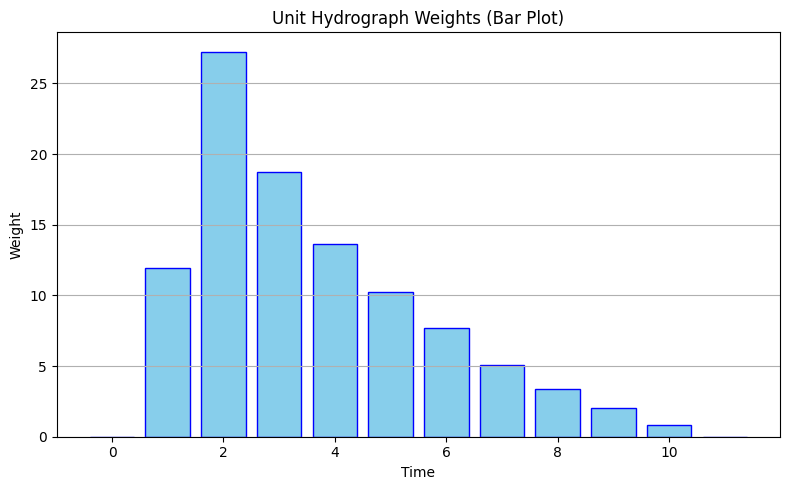

In [16]:
import matplotlib.pyplot as plt

uh_weights = [0.0, 11.923, 27.2526, 18.7362, 13.6263, 10.2197, 7.66479,
              5.10986, 3.40657, 2.04394, 0.85164, 0.0]
time = list(range(len(uh_weights)))

plt.figure(figsize=(8, 5))
plt.bar(time, uh_weights, color='skyblue', edgecolor='blue')

plt.title("Unit Hydrograph Weights (Bar Plot)")
plt.xlabel("Time")
plt.ylabel("Weight")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


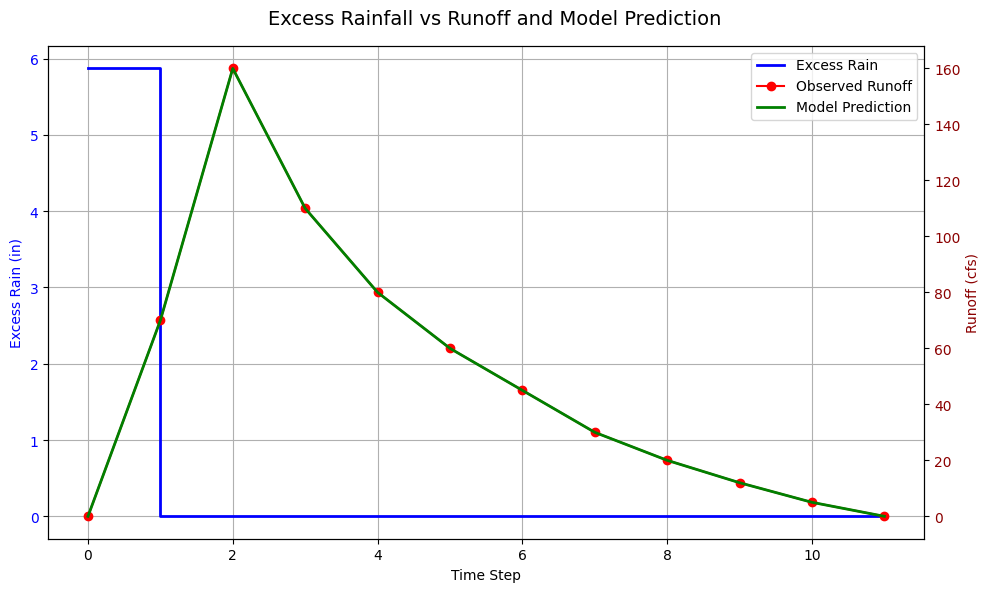

In [17]:
# After Modeling using the Excel sheet - rendering results
import matplotlib.pyplot as plt

# === Data Lists ===
excess_rain = [5.871, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
direct_runoff = [0, 70, 160, 110, 80, 60, 45, 30, 20, 12, 5, 0]
model_runoff =   [0, 70, 160, 110, 80, 60, 45, 30, 20, 12, 5, 0]
time = list(range(len(excess_rain)))

# === Create figure and axes ===
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Left Y-axis: Rainfall ---
ax1.set_xlabel("Time Step")
ax1.set_ylabel("Excess Rain (in)", color='blue')
rain_line = ax1.step(time, excess_rain, where='post', color='blue', linewidth=2, label="Excess Rain")[0]
ax1.tick_params(axis='y', labelcolor='blue')

# --- Right Y-axis: Runoff and Model ---
ax2 = ax1.twinx()
ax2.set_ylabel("Runoff (cfs)", color='darkred')
runoff_line, = ax2.plot(time, direct_runoff, 'ro-', label="Observed Runoff", linewidth=1.5)
model_line, = ax2.plot(time, model_runoff, 'g-', label="Model Prediction", linewidth=2)
ax2.tick_params(axis='y', labelcolor='darkred')

# --- Title and Grid ---
fig.suptitle("Excess Rainfall vs Runoff and Model Prediction", fontsize=14)
fig.tight_layout()
ax1.grid(True)

# --- Combined Legend ---
lines = [rain_line, runoff_line, model_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper right')

plt.show()

